# Cleaning Data

In [92]:
! pip install pandas
! pip install sklearn

In [93]:
! pip install matplotlib

In [94]:
import os
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, FeatureUnion

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import auc, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score



In [95]:
DF_PATH       = "preprocessed_data.pkl"
FEATURES_PATH = "features_skills_clusters.pkl"

ROLE_COLS      = ['DevType']
TECH_COLS      = ['LanguageHaveWorkedWith',
                  'DatabaseHaveWorkedWith',
                  'PlatformHaveWorkedWith',
                  'WebframeHaveWorkedWith',
                  'MiscTechHaveWorkedWith',
                  'ToolsTechHaveWorkedWith',
                  'NEWCollabToolsHaveWorkedWith']
EXCULDE_ROLES = [
    'Other (please specify):',
    'Student',
    'Designer',
    'Educator',
    'Marketing or sales professional',
    'Engineering manager',
    'Senior Executive (C-Suite, VP, etc.)',
    'Product manager',
    'Engineer, site reliability']

EXPORT_PATH    = "2_cleaned_data.pkl"

In [96]:
# Read Data 
processed_df = pd.read_pickle(DF_PATH)
features_df = pd.read_pickle(FEATURES_PATH)

In [97]:
processed_df

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,[I am a developer by profession],"[Independent contractor, freelancer, or self-e...",[Slovakia],[],[],"[Secondary school (e.g. American high school, ...",[18 - 24 years],"[Coding Bootcamp, Other online resources (ex: ...",NaN,...,[25-34 years old],[Man],[No],[Straight / Heterosexual],[White or of European descent],[None of the above],[None of the above],[Appropriate in length],[Easy],62268.0
1,2,[I am a student who is learning to code],"[Student, full-time]",[Netherlands],[],[],"[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]",[11 - 17 years],"[Other online resources (ex: videos, blogs, et...",7.0,...,[18-24 years old],[Man],[No],[Straight / Heterosexual],[White or of European descent],[None of the above],[None of the above],[Appropriate in length],[Easy],NaN
2,3,"[I am not primarily a developer, but I write c...","[Student, full-time]",[Russian Federation],[],[],"[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]",[11 - 17 years],"[Other online resources (ex: videos, blogs, et...",NaN,...,[18-24 years old],[Man],[No],[Prefer not to say],[Prefer not to say],[None of the above],[None of the above],[Appropriate in length],[Easy],NaN
3,4,[I am a developer by profession],[Employed full-time],[Austria],[],[],"[Master’s degree (M.A., M.S., M.Eng., MBA, etc.)]",[11 - 17 years],[],NaN,...,[35-44 years old],[Man],[No],[Straight / Heterosexual],[White or of European descent],[I am deaf / hard of hearing],[],[Appropriate in length],[Neither easy nor difficult],NaN
4,5,[I am a developer by profession],"[Independent contractor, freelancer, or self-e...",[United Kingdom of Great Britain and Northern ...,[],[England],"[Master’s degree (M.A., M.S., M.Eng., MBA, etc.)]",[5 - 10 years],[Friend or family member],17.0,...,[25-34 years old],[Man],[No],[],[White or of European descent],[None of the above],[],[Appropriate in length],[Easy],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,83435,[I am a developer by profession],[Employed full-time],[United States of America],[Texas],[],"[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]",[11 - 17 years],"[Other online resources (ex: videos, blogs, et...",6.0,...,[25-34 years old],[Man],[No],[Straight / Heterosexual],[White or of European descent],[None of the above],[I have a concentration and/or memory disorder...,[Appropriate in length],[Easy],160500.0
83435,83436,[I am a developer by profession],"[Independent contractor, freelancer, or self-e...",[Benin],[],[],"[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]",[11 - 17 years],"[Other online resources (ex: videos, blogs, et...",4.0,...,[18-24 years old],[Man],[No],[Straight / Heterosexual],[Black or of African descent],[None of the above],[None of the above],[Appropriate in length],[Easy],3960.0
83436,83437,[I am a developer by profession],[Employed full-time],[United States of America],[New Jersey],[],"[Secondary school (e.g. American high school, ...",[11 - 17 years],[School],10.0,...,[25-34 years old],[Man],[No],[],[White or of European descent],[None of the above],[None of the above],[Appropriate in length],[Neither easy nor difficult],90000.0
83437,83438,[I am a developer by profession],[Employed full-time],[Canada],[],[],"[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]",[11 - 17 years],"[Online Courses or Certification, Books / Phys...",5.0,...,[25-34 years old],[Man],[No],[Straight / Heterosexual],[White or of European descent],[None of the above],[I have a mood or emotional disorder (e.g. dep...,[Appropriate in length],[Neither easy nor difficult],816816.0


In [98]:
features_df

,skills_group0,skills_group1,skills_group10,skills_group11,skills_group12,skills_group13,skills_group14,skills_group15,skills_group16,skills_group17,...,skills_group21,skills_group22,skills_group23,skills_group3,skills_group4,skills_group5,skills_group6,skills_group7,skills_group8,skills_group9
0,0,1,14,0,0,0,0,0,0,6,...,0,1,0,0,0,0,0,8,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,3,1,0,1,0,1,4,0,3
2,8,0,1,7,1,0,5,0,2,0,...,0,0,0,0,0,0,0,0,8,2
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,8,0,9
4,0,0,0,0,1,8,3,0,0,0,...,0,6,0,0,1,0,0,8,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,0,0,1,0,1,5,0,4,0,0,...,0,3,1,8,0,0,0,0,1,1
83435,0,1,1,1,1,0,0,0,0,5,...,0,3,1,0,4,0,3,0,1,2
83436,0,0,1,0,1,0,4,0,0,0,...,2,11,9,1,2,0,1,0,1,2
83437,0,0,0,0,1,0,4,0,0,0,...,0,11,0,1,0,0,0,6,8,6


In [99]:
encoded_dfs = {}
for col in ROLE_COLS + TECH_COLS:
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binarizer.fit_transform(processed_df[col]),
                               columns=binarizer.classes_,
                               index=processed_df[col].index)
    encoded_dfs[col] = encoded_df

# Merge 1-hot encoded
encoded_dfs = pd.concat(encoded_dfs, axis=1)

In [100]:
encoded_dfs


DevType                           \
      Academic researcher Data or business analyst   
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   
...                   ...                      ...   
83434                   0                        0   
83435                   0                        0   
83436                   0                        0   
83437                   0                        0   
83438                   0                        0   

                                                                            \
      Data scientist or machine learning specialist Database administrator   
0                                                 0                      0   
1                                                 0                      0   
2                                                 0                      0   
3                                                 0                      0   
4                                                 0                      0   
...                                             ...                    ...   
83434                                             0                      0   
83435                                             0                      0   
83436                                             1                      0   
83437                                             0                      0   
83438                                             0                      0   

                                                                            \
      Designer DevOps specialist Developer, QA or test Developer, back-end   
0            0                 0                     0                   0   
1            0                 0                     0                   0   
2            0                 0                     0                   0   
3            0                 0                     0                   0   
4            0                 0                     0                   0   
...        ...               ...                   ...                 ...   
83434        0                 0                     0                   1   
83435        0                 0                     0                   0   
83436        0                 1                     0                   0   
83437        0                 0                     0                   1   
83438        0                 0                     0                   1   

                                                     \
      Developer, desktop or enterprise applications   
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 1   
...                                             ...   
83434                                             0   
83435                                             0   
83436                                             0   
83437                                             0   
83438                                             0   

                                                   ...  \
      Developer, embedded applications or devices  ...   
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   
...                                           ...  ...   
83434                                           0  ...   
83435                                          

In [101]:
i = np.random.randint(processed_df.shape[0])

# Print original values
print(processed_df.iloc[i][ROLE_COLS].tolist())
print(processed_df.iloc[i][TECH_COLS].tolist())
print("----------------")

# Print processed
print(encoded_dfs.iloc[i][encoded_dfs.iloc[i] == 1])
print("----------------")

# Check clustering 
print("Clusters:",features_df.iloc[i].sum())
print("Skills:",  encoded_dfs[TECH_COLS].iloc[i].sum())

[['Developer, front-end', 'Developer, full-stack', 'Developer, back-end']]
[['HTML/CSS', 'JavaScript'], ['Firebase', 'MySQL'], [], ['Gatsby', 'jQuery', 'React.js'], [], ['Git', 'Yarn'], ['Notepad++', 'Sublime Text', 'Visual Studio Code']]
----------------
DevType                       Developer, back-end      1
                              Developer, front-end     1
                              Developer, full-stack    1
LanguageHaveWorkedWith        HTML/CSS                 1
                              JavaScript               1
DatabaseHaveWorkedWith        Firebase                 1
                              MySQL                    1
WebframeHaveWorkedWith        Gatsby                   1
                              React.js                 1
                              jQuery                   1
ToolsTechHaveWorkedWith       Git                      1
                              Yarn                     1
NEWCollabToolsHaveWorkedWith  Notepad++                1
   

In [102]:
for role in EXCULDE_ROLES:
    encoded_dfs = encoded_dfs.drop(("DevType", role), axis=1)

In [103]:
# Check the total samples of roles
original_role_sum = encoded_dfs["DevType"].sum(axis=0)
original_role_sum

Academic researcher                               2899
Data or business analyst                          3792
Data scientist or machine learning specialist     4273
Database administrator                            5655
DevOps specialist                                 7058
Developer, QA or test                             3611
Developer, back-end                              29071
Developer, desktop or enterprise applications    11036
Developer, embedded applications or devices       4598
Developer, front-end                             18231
Developer, full-stack                            32891
Developer, game or graphics                       2112
Developer, mobile                                 9800
Engineer, data                                    4176
Scientist                                         2015
System administrator                              6079
dtype: int64

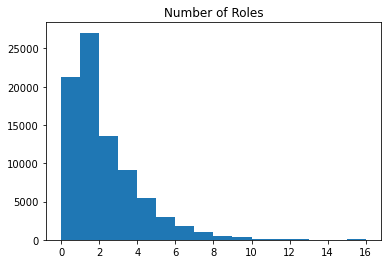

In [104]:
freq_roles = encoded_dfs[ROLE_COLS].sum(axis=1)
plt.hist(freq_roles, freq_roles.max())
plt.title('Number of Roles')
plt.show()

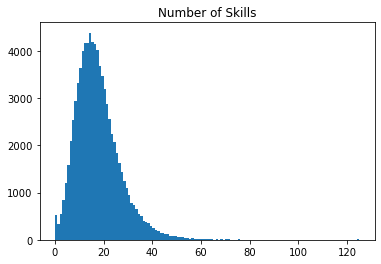

In [105]:
freq_tech = encoded_dfs[TECH_COLS].sum(axis=1)
plt.hist(freq_tech, freq_tech.max())
plt.title('Number of Skills')
plt.show()

In [106]:
ROLES_RANGE = [1,3]
TECH_RANGE  = [3,30]

role_mask   = (freq_roles >= ROLES_RANGE[0]) & (freq_roles <= ROLES_RANGE[1])
tech_mask   = (freq_tech >= TECH_RANGE[0])   & (freq_tech <= TECH_RANGE[1])
filter_mask = role_mask & tech_mask

features_df = features_df.loc[filter_mask].copy()
encoded_dfs = encoded_dfs.loc[filter_mask].copy()
# Check the total samples of roles

cleaned_role_sum = encoded_dfs["DevType"].sum(axis=0)
cleaned_role_sum

Academic researcher                               1708
Data or business analyst                          1658
Data scientist or machine learning specialist     2460
Database administrator                            1210
DevOps specialist                                 3056
Developer, QA or test                             1135
Developer, back-end                              17084
Developer, desktop or enterprise applications     4845
Developer, embedded applications or devices       2138
Developer, front-end                              8932
Developer, full-stack                            20655
Developer, game or graphics                        899
Developer, mobile                                 4751
Engineer, data                                    1941
Scientist                                         1046
System administrator                              2069
dtype: int64

In [107]:
features_df.columns = pd.MultiIndex.from_product([['skills_clusters'], 
                                                  features_df.columns])

In [108]:
df = pd.concat([encoded_dfs, features_df], axis=1)

In [109]:
df.to_pickle(EXPORT_PATH)

## Building Models

In [110]:
! pip install mlflow 


In [111]:
import mlflow


In [112]:
from mlflow.tracking import MlflowClient
from pathlib import Path


In [113]:
MLFLOW_TRACKING_URI = '../models/mlruns'
MLFLOW_EXPERIMENT_NAME = "skills_jobs_stackoverflow"

LOG_PATH = "../models/temp/"
LOG_DATA_PKL    =  "data.pkl"
LOG_MODEL_PKL   =  "model.pkl"
LOG_METRICS_PKL =  "metrics.pkl"

In [114]:
Path(MLFLOW_TRACKING_URI).mkdir(parents=True, exist_ok=True)
Path(LOG_PATH).mkdir(parents=True, exist_ok=True)

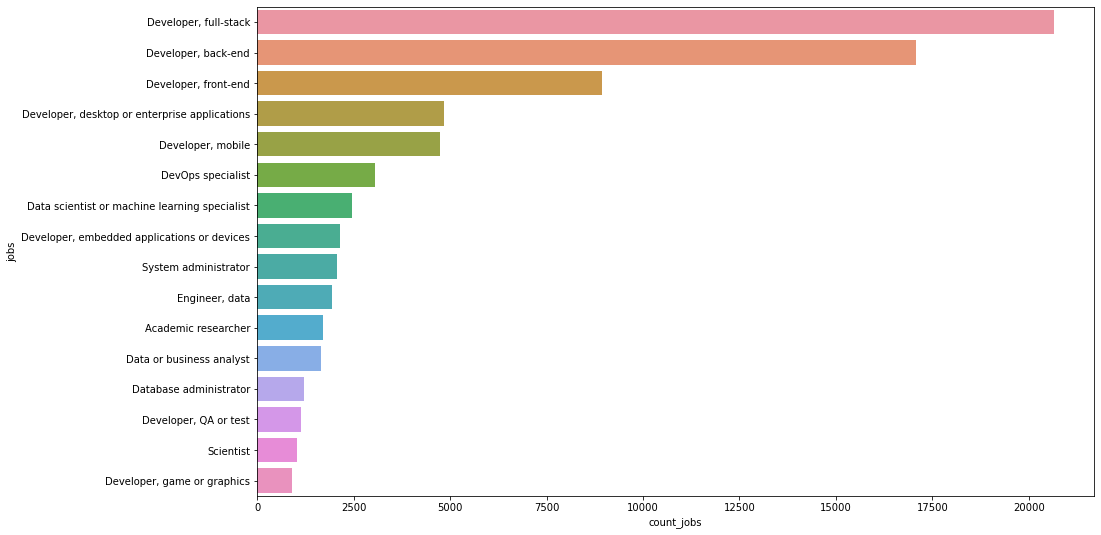

In [115]:
roles_df=df['DevType'].copy()
roles_count=pd.DataFrame(roles_df.sum(axis=0))
roles_count.reset_index(level=0,inplace=True)
roles_count.columns=['jobs','count_jobs']

plt.figure(figsize=(15,9))
sns.barplot(data=roles_count.sort_values(by='count_jobs',ascending=False),x='count_jobs',y='jobs')
plt.show()

### Remarques : 

- Our Data is highly imbalanced

In [116]:
# Resampling roles

#I'll fixe my random_state parameter to have a fix accuracy. if i run same notebook i will have same output

samples_per_class=1200 
resampled_roles = []

for col in roles_df.columns:
    sub_df=roles_df.loc[roles_df[col]==1].copy()
    
    if len(sub_df)<samples_per_class:
        
        #Upsample
        
        sub_df = sub_df.sample(samples_per_class,replace=True,random_state=0)
        
    else:
        
        #Downsample
        
        sub_df=sub_df.sample(samples_per_class,random_state=0)
        
    resampled_roles.append(sub_df)

In [117]:
roles_df=pd.concat(resampled_roles)
df = df.loc[roles_df.index].copy()


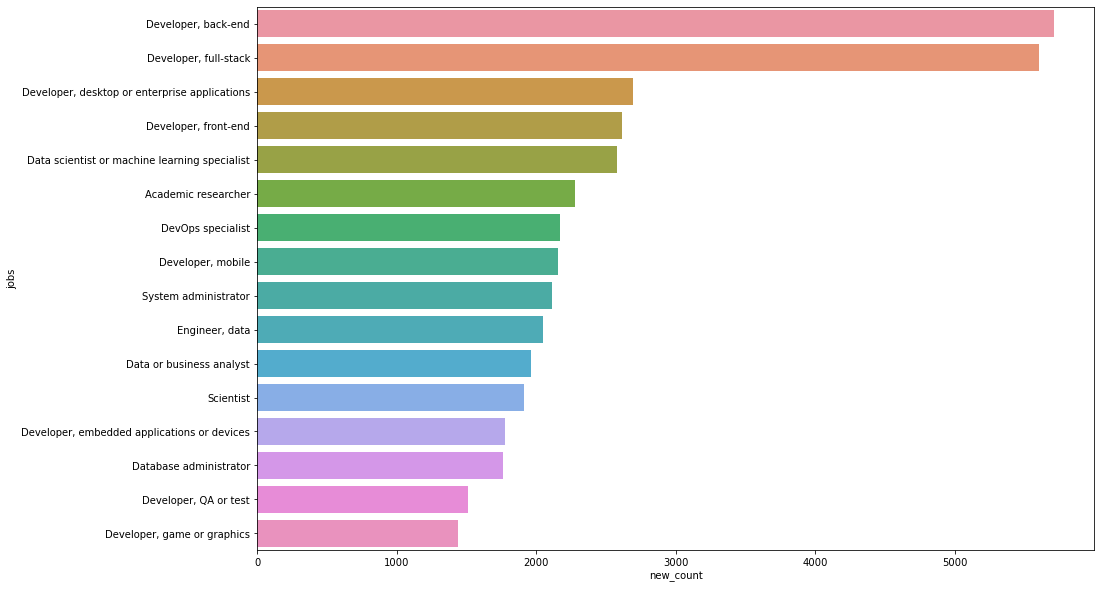

In [118]:
roles_balanced=pd.DataFrame(roles_df.sum(axis=0))
roles_balanced.reset_index(level=0,inplace=True)
roles_balanced.columns=['jobs','new_count']

plt.figure(figsize=(15,10))
sns.barplot(data=roles_balanced.sort_values(by='new_count',ascending=False),y='jobs',x='new_count')
plt.show()

### Splitting Data

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop("DevType", axis=1), 
                                                    df["DevType"], 
                                                    random_state=0)



print('train_data {}'.format(X_train.shape))

print('test_data {}'.format(X_test.shape))


train_data (14400, 149)
test_data (4800, 149)


C:\Users\adminn\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [120]:
X_train.values

array([[ 0,  0,  0, ..., 16,  8,  0],
       [ 0,  0,  0, ..., 20,  4,  8],
       [ 0,  0,  0, ...,  8,  0, 10],
       ...,
       [ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  1, ..., 14, 13,  3],
       [ 0,  0,  0, ...,  0,  0,  2]], dtype=int64)

# Training and Tracking

In [121]:
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
client = MlflowClient()
mlflow.get_experiment_by_name(MLFLOW_EXPERIMENT_NAME)
exp = client.get_experiment_by_name(MLFLOW_EXPERIMENT_NAME)

### Model Implementation

- Since i have some outliers, to fix that i chose Robust Scaler
- Many features are there so i need dimensionality reduction


**1. Vanilla Forest**

In [122]:
rf_pipe=make_pipeline(RobustScaler(),
                      PCA(n_components=0.95),
                         RandomForestClassifier(n_jobs=8,
                                               verbose=1,
                                               random_state=0))

rf_pipe.fit(X_train.values,Y_train.values)

predictions=pd.DataFrame(rf_pipe.predict(X_train.values),columns=Y_train.columns)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    4.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   11.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.6s finished


In [123]:
predictions

,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,DevOps specialist,"Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices","Developer, front-end","Developer, full-stack","Developer, game or graphics","Developer, mobile","Engineer, data",Scientist,System administrator
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14395,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
14396,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
14397,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
14398,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [124]:
def calculate_preformance(ground_truth, predictions, metric_function, sort_values=False):
    quality_scores = {}
    for col in predictions.columns:
        role_pred  = predictions[col].copy()
        role_truth = ground_truth[col].copy()
        quality_scores[col] = round(metric_function(role_truth, role_pred) * 100, 2)
        
    quality_scores = pd.Series(quality_scores.values(), index=quality_scores.keys())
    if sort_values:
        quality_scores = quality_scores.sort_values()
    
    return quality_scores

In [125]:
train_scores={score.__name__:calculate_preformance(Y_train,predictions,score)
             for score in [accuracy_score,precision_score,recall_score,f1_score]}
train_scores=pd.concat(train_scores,axis=1)

In [126]:
train_scores

,accuracy_score,precision_score,recall_score,f1_score
Academic researcher,99.98,99.88,99.94,99.91
Data or business analyst,100.00,100.00,100.00,100.00
Data scientist or machine learning specialist,99.99,99.90,100.00,99.95
Database administrator,100.00,100.00,100.00,100.00
DevOps specialist,99.99,100.00,99.94,99.97
"Developer, QA or test",99.99,99.91,100.00,99.96
"Developer, back-end",99.99,100.00,99.95,99.98
"Developer, desktop or enterprise applications",99.99,99.95,99.95,99.95
"Developer, embedded applications or devices",99.99,100.00,99.85,99.93
"Developer, front-end",100.00,100.00,100.00,100.00


In [127]:
prediction_test=pd.DataFrame(rf_pipe.predict(X_test.values),
                            columns=Y_test.columns)

test_score={score.__name__:calculate_preformance(Y_test,prediction_test,score)
           for score in [accuracy_score,precision_score,recall_score,f1_score]}

test_score=pd.concat(test_score,axis=1)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished


In [128]:
mean_test_scores=test_score.mean()

# LOG

In [129]:
data_details = {"data_path": DF_PATH,
                "training_indices": X_train.index.tolist(),
                "test_indices": X_test.index.tolist(),
                "features_names": X_train.columns.droplevel(0).tolist(),
                "targets_names": Y_train.columns.tolist()}

with open(os.path.join(LOG_PATH, LOG_DATA_PKL), "wb") as output_file:
    pickle.dump(data_details, output_file)

In [130]:
# Model

model= {"model_description":"Random Forest: with PCA - Basic",
       "model_details":str(rf_pipe),
       "model_object":rf_pipe}

with open(os.path.join(LOG_PATH,LOG_MODEL_PKL),"wb") as output_file:
    pickle.dump(model,output_file)
    


In [131]:
#Performance details

classes_metrics ={"train_scores":train_scores,
                 "test_scores":test_score}
with open(os.path.join(LOG_PATH,LOG_METRICS_PKL),"wb") as output_file:
    pickle.dump(classes_metrics,output_file)


In [132]:
#Start a new run and track parameters

with mlflow.start_run(experiment_id=exp.experiment_id,
                      run_name=model["model_description"]):
    # Log pickles
    mlflow.log_artifacts(LOG_PATH)

    # Track metrics
    for metric, score in mean_test_scores.items():
        mlflow.log_metric(metric, score)

**2. Hyper parameter Tuning**

In [138]:
from sklearn.model_selection import RandomizedSearchCV
htp_rf_pipe=make_pipeline(RobustScaler(),
                         PCA(),
                         RandomForestClassifier(n_jobs=-1,
                                               verbose=1,
                                               random_state=0))

hp_param=[{
    'pca__n_components':[0.7,0.8],
    'randomforestclassifier__n_estimators':[250,600],
    'randomforestclassifier__max_depth':[3,10,None],
}]



In [139]:
hp_rf_pipe=RandomizedSearchCV(htp_rf_pipe,hp_param)
hp_rf_pipe.fit(X_train.values,Y_train.values)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   36.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   37.6s finished
[

[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    7.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    8.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend wit

[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 235 out of 250 | elapsed:    4.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    4.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 235 out of 250 | elapsed:    4.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    4.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: 

[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 235 out of 250 | elapsed:    4.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    4.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 235 out of 250 | elapsed:    3.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    4.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: 

RandomizedSearchCV(estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                             ('pca', PCA()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(n_jobs=-1,
                                                                     random_state=0,
                                                                     verbose=1))]),
                   param_distributions=[{'pca__n_components': [0.7, 0.8],
                                         'randomforestclassifier__max_depth': [3,
                                                                               10,
                                                                               None],
                                         'randomforestclassifier__n_estimators': [250,
                                                                                  600]}])

In [141]:
X_train

LanguageHaveWorkedWith                                              \
                         APL Assembly Bash/Shell  C C# C++ COBOL Clojure   
62188                      0        0          0  0  0   0     0       0   
6156                       0        0          0  0  0   0     0       0   
12638                      0        0          0  0  1   0     0       0   
57207                      0        0          1  0  0   0     0       0   
70424                      0        0          0  1  1   1     0       0   
...                      ...      ...        ... .. ..  ..   ...     ...   
68219                      0        0          0  0  0   0     0       0   
77346                      0        0          1  0  0   0     0       1   
15317                      0        0          0  1  0   1     0       0   
66498                      0        0          1  1  0   1     0       0   
19386                      0        0          0  0  0   0     0       0   

                    ... skills_clusters                                \
      Crystal Dart  ...  skills_group21 skills_group22 skills_group23   
62188       0    0  ...               0              0              0   
6156        0    0  ...               0              1              0   
12638       0    0  ...               0              2              5   
57207       0    0  ...               0              1              0   
70424       0    0  ...               0              8              4   
...       ...  ...  ...             ...            ...            ...   
68219       0    0  ...               0              0              0   
77346       0    0  ...               0              3              0   
15317       0    0  ...               0              0              0   
66498       0    0  ...               0              2              0   
19386       0    0  ...               0              1              0   

                                                                             \
      skills_group3 skills_group4 skills_group5 skills_group6 skills_group7   
62188             0             1             0             0            16   
6156              0             1             0             0            20   
12638             1             5             0             2             8   
57207             0             1             0             0            12   
70424             2             5             0             0            10   
...             ...           ...           ...           ...           ...   
68219             0             0             0             1            16   
77346             8             0             0             0             0   
15317             0             3             0             0             0   
66498             0             0             0             0            14   
19386             0             0             0             0             0   

                                   
      skills_group8 skills_group9  
62188             8             0  
6156              4             8  
12638             0            10  
57207             9             1  
70424             0             3  
...             ...           ...  
68219             0            13  
77346             8             2  
15317             0             1  
66498            13             3  
19386             0             2  

[14400 rows x 149 columns]

In [140]:
hp_rf_pipe.best_params_


{'randomforestclassifier__n_estimators': 600,
 'randomforestclassifier__max_depth': None,
 'pca__n_components': 0.8}